In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the dataset using pandas
data = pd.read_csv("./individual_stocks_5yr/GOOG_data.csv") 
data.head(5)

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [5]:
data.describe()

,open,high,low,close,volume
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02
mean,725.364168,730.822248,719.456843,725.403353,1.808414e+06
std,165.996590,166.847404,165.526487,166.420529,9.479685e+05
min,494.650000,495.976000,487.560000,492.550000,7.932000e+03
25%,565.113000,570.380000,559.055000,564.785000,1.261927e+06
50%,722.710000,727.000000,716.430000,720.640000,1.576830e+06
75%,822.035000,826.185000,818.725000,823.330000,2.052652e+06
max,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07


In [6]:
# Select only the important features i.e. the date and price
data = data[["date","close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"date":"ds","close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2014-03-27,558.46
1,2014-03-28,559.99
2,2014-03-31,556.97
3,2014-04-01,567.16
4,2014-04-02,567.00


In [7]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

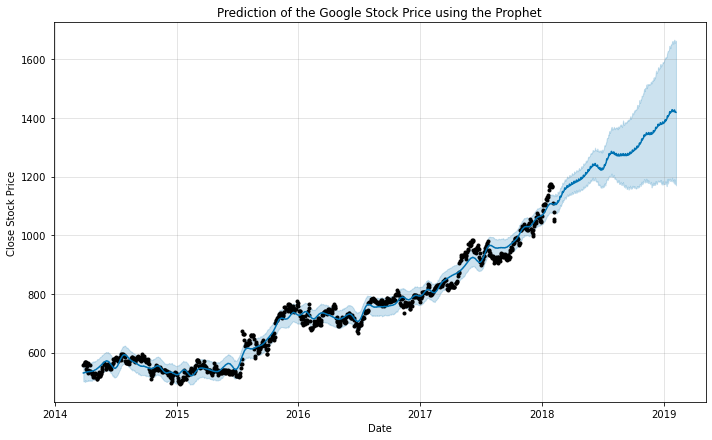

In [8]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

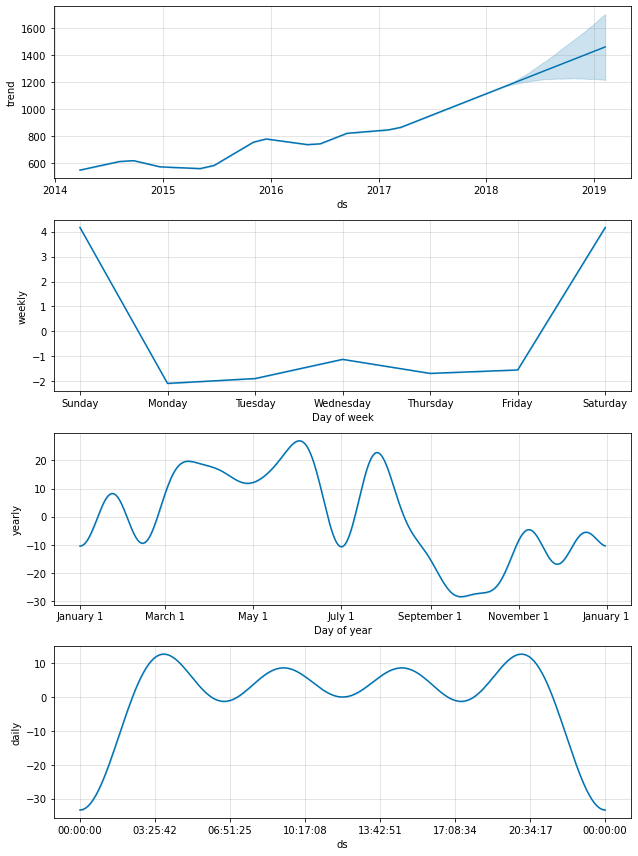

In [9]:
m.plot_components(prediction)
plt.show()